<a href="https://colab.research.google.com/github/djacque1/MSSP607/blob/main/Assignment%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pushd "/content/drive/MyDrive/MSSP 607/Modules/Week_11/"

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-65-fc3586e7a0b8>", line 1, in <cell line: 1>
    get_ipython().run_line_magic('pushd', '"/content/drive/MyDrive/MSSP 607/Modules/Week_11/"')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-88>", line 2, in pushd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 505, in pushd
    cwd = os.getcwd().replace(self.shell.home_dir,'~')
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

In [64]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
%matplotlib inline
import os
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Image

In [ ]:
directory = '/content/drive/MyDrive/MSSP607/Modules/Week_11/'
file_name = 'HousingPrices.csv'
file_path = os.path.join(directory, file_name)
housing_prices = pd.read_csv(file_name)
housing_prices

In [ ]:
## getting overview of the data before I begin
housing_prices.info()   ## we see that lot frontage, lot area, total basement square footage,
                        ## are all missing data. I wont be doing any analysis on these attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1460 non-null   int64  
 1   LotFrontage  1201 non-null   float64
 2   LotArea      1341 non-null   float64
 3   HouseStyle   1460 non-null   object 
 4   OverallQual  1460 non-null   int64  
 5   OverallCond  1460 non-null   int64  
 6   YearBuilt    1460 non-null   int64  
 7   TotalBsmtSF  913 non-null    float64
 8   CentralAir   1460 non-null   object 
 9   1stFlrSF     1460 non-null   int64  
 10  2ndFlrSF     1460 non-null   int64  
 11  FullBath     1460 non-null   int64  
 12  TotalRooms   1460 non-null   int64  
 13  GarageCars   1460 non-null   int64  
 14  GarageArea   1460 non-null   int64  
 15  YrSold       1460 non-null   int64  
 16  SalePrice    1460 non-null   int64  
dtypes: float64(3), int64(12), object(2)
memory usage: 194.0+ KB


In [ ]:
housing_prices['YearBuilt']= pd.to_datetime(housing_prices['YearBuilt'])
housing_prices

,Id,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,TotalRooms,GarageCars,GarageArea,YrSold,SalePrice
0,1,65.0,8450.0,2Story,7,5,1970-01-01 00:00:00.000002003,856.0,Y,856,854,2,8,2,548,2008,208500
1,2,80.0,9600.0,1Story,6,8,1970-01-01 00:00:00.000001976,NaN,Y,1262,0,2,6,2,460,2007,181500
2,3,68.0,11250.0,2Story,7,5,1970-01-01 00:00:00.000002001,920.0,Y,920,866,2,6,2,608,2008,223500
3,4,60.0,9550.0,2Story,7,5,1970-01-01 00:00:00.000001915,NaN,Y,961,756,1,7,3,642,2006,140000
4,5,84.0,14260.0,2Story,8,5,1970-01-01 00:00:00.000002000,1145.0,Y,1145,1053,2,9,3,836,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917.0,2Story,6,5,1970-01-01 00:00:00.000001999,NaN,Y,953,694,2,7,2,460,2007,175000
1456,1457,85.0,13175.0,1Story,6,6,1970-01-01 00:00:00.000001978,1542.0,Y,2073,0,2,7,2,500,2010,210000
1457,1458,66.0,9042.0,2Story,7,9,1970-01-01 00:00:00.000001941,1152.0,Y,1188,1152,2,9,1,252,2010,266500
1458,1459,68.0,9717.0,1Story,5,6,1970-01-01 00:00:00.000001950,1078.0,Y,1078,0,1,5,1,240,2010,142125


In [ ]:

selected_columns = ['HouseStyle', 'FullBath', 'CentralAir','GarageCars','YrSold','TotalRooms','OverallQual','SalePrice']  # Replace with your actual column names


new_df = housing_prices[selected_columns]
new_df


,HouseStyle,FullBath,CentralAir,GarageCars,YrSold,TotalRooms,OverallQual,SalePrice
0,2Story,2,Y,2,2008,8,7,208500
1,1Story,2,Y,2,2007,6,6,181500
2,2Story,2,Y,2,2008,6,7,223500
3,2Story,1,Y,3,2006,7,7,140000
4,2Story,2,Y,3,2008,9,8,250000
...,...,...,...,...,...,...,...,...
1455,2Story,2,Y,2,2007,7,6,175000
1456,1Story,2,Y,2,2010,7,6,210000
1457,2Story,2,Y,1,2010,9,7,266500
1458,1Story,1,Y,1,2010,5,5,142125


In [ ]:
new_df.describe() ##converted to latex code.

,FullBath,GarageCars,YrSold,TotalRooms,OverallQual,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.565068,1.767123,2007.815753,6.517808,6.099315,180921.195890
std,0.550916,0.747315,1.328095,1.625393,1.382997,79442.502883
min,0.000000,0.000000,2006.000000,2.000000,1.000000,34900.000000
25%,1.000000,1.000000,2007.000000,5.000000,5.000000,129975.000000
50%,2.000000,2.000000,2008.000000,6.000000,6.000000,163000.000000
75%,2.000000,2.000000,2009.000000,7.000000,7.000000,214000.000000
max,3.000000,4.000000,2010.000000,14.000000,10.000000,755000.000000


In [ ]:
info1 = new_df.groupby('OverallQual')['SalePrice'].mean()
info1

In [ ]:
infoa = new_df.groupby('OverallQual').size()
print(infoa)


In [ ]:
infoa.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('Overall Quality')
plt.ylabel('Count')
plt.title('Count of Each Overall Quality Level')

# Show the plot
plt.show()


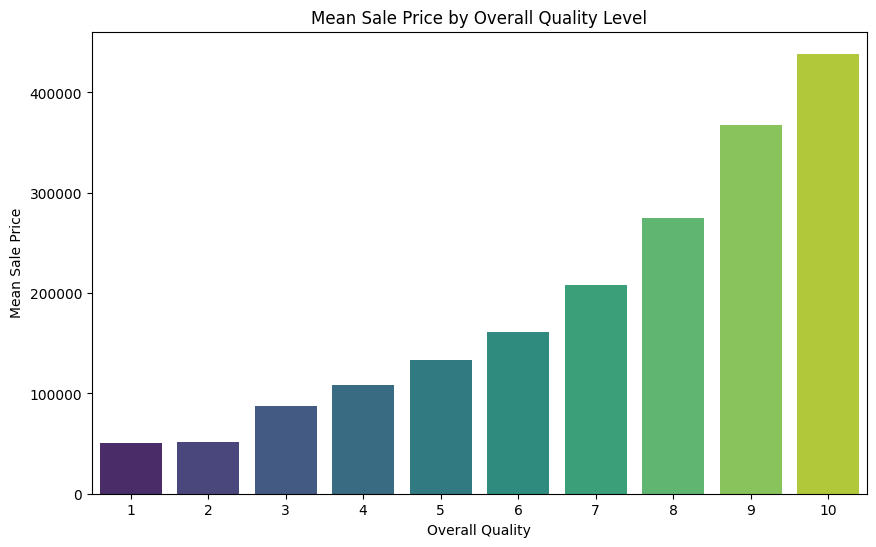

In [ ]:
# Assuming 'new_df' is your DataFrame
infoe = new_df.groupby(['OverallQual'])['SalePrice'].mean().reset_index()

# Create a cool chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='OverallQual', y='SalePrice', data=infoe, palette='viridis')

# Add labels and title
plt.xlabel('Overall Quality')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price by Overall Quality Level')

# Show the plot
plt.show()

In [ ]:
info2 = new_df.groupby('CentralAir')['SalePrice'].mean()
info2

CentralAir
N    105264.073684
Y    186186.709890
Name: SalePrice, dtype: float64

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Custom TB Handler failed, unregistering
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/seaborn/palettes.py", line 235, in color_palette
    palette = mpl_palette(palette, n_colors, as_cmap=as_cmap)
  File "/usr/local/lib/python3.10/dist-packages/seaborn/palettes.py", line 406, in mpl_palette
    cmap = get_colormap(name)
  File "/usr/local/lib/python3.10/dist-packages/seaborn/_compat.py", line 133, in get_colormap
    return mpl.colormaps[name]
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py", line 82, in __getitem__
    raise KeyError(f"{item!r} is not a known colormap name") from None
KeyError: "'greeen' is not a known colormap name"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-61-506abcdae645>", line 10, in <cell line: 10>
    sns.

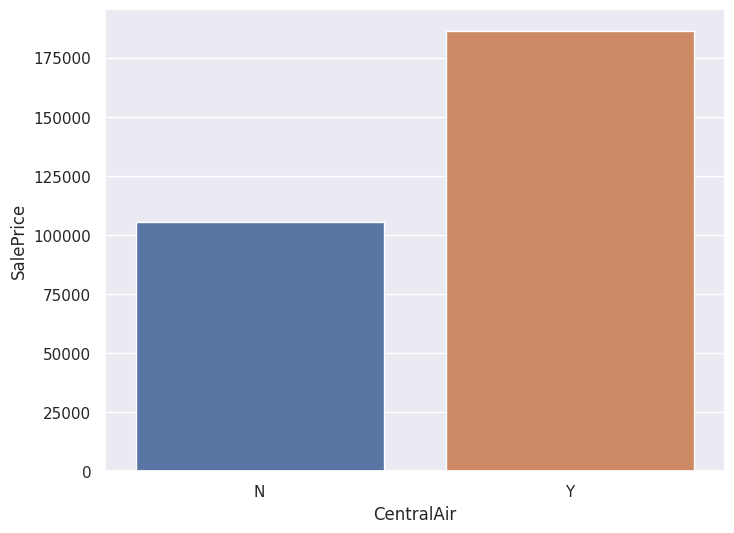

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_df' is your DataFrame
info2 = new_df.groupby('CentralAir')['SalePrice'].mean().reset_index()

# Create a bar chart with Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='CentralAir', y='SalePrice', data=info2)
sns.color_palette("Blues", as_cmap=True)
# Add labels and title
plt.xlabel('Central Air Conditioning')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price Based on Central Air Conditioning')

# Show the plot
plt.show()



In [ ]:
info3 = new_df.groupby(['FullBath'])['SalePrice'].mean()
info3

FullBath
0    165200.888889
1    134751.440000
2    213009.825521
3    347822.909091
Name: SalePrice, dtype: float64

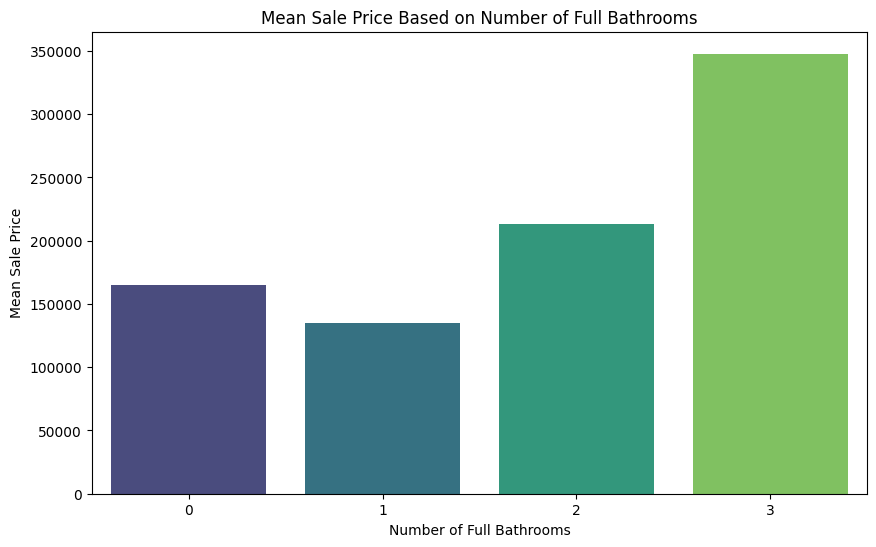

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_df' is your DataFrame
info3 = new_df.groupby(['FullBath'])['SalePrice'].mean().sort_index()

# Create a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=info3.index, y=info3.values, palette='viridis')

# Add labels and title
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price Based on Number of Full Bathrooms')

# Show the plot
plt.show()



In [ ]:
info4 = new_df.groupby(['TotalRooms'])['SalePrice'].mean()
info4

TotalRooms
2      39300.000000
3     111217.647059
4     122844.628866
5     141550.749091
6     161303.296020
7     196666.784195
8     213427.529412
9     252988.173333
10    296279.170213
11    318022.000000
12    280971.454545
14    200000.000000
Name: SalePrice, dtype: float64

In [ ]:
infob = new_df.groupby('TotalRooms').size()
print(infob)

TotalRooms
2       1
3      17
4      97
5     275
6     402
7     329
8     187
9      75
10     47
11     18
12     11
14      1
dtype: int64


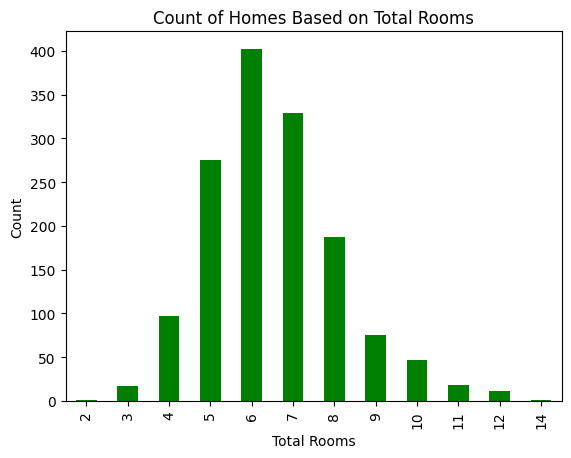

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'new_df' is your DataFrame
infob = new_df.groupby('TotalRooms').size()

# Create a bar chart
infob.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('Total Rooms')
plt.ylabel('Count')
plt.title('Count of Homes Based on Total Rooms')

# Show the plot
plt.show()


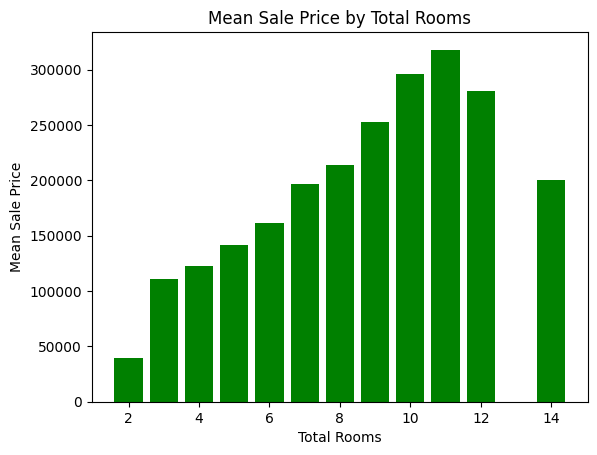

In [ ]:
import matplotlib.pyplot as plt

# Group by 'TotalRooms' and calculate mean sale prices
info4 = new_df.groupby(['TotalRooms'])['SalePrice'].mean()

# Create a histogram
plt.bar(info4.index, info4.values, width=0.8, color='green')

# Add labels and title
plt.xlabel('Total Rooms')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price by Total Rooms')

# Show the plot
plt.show()


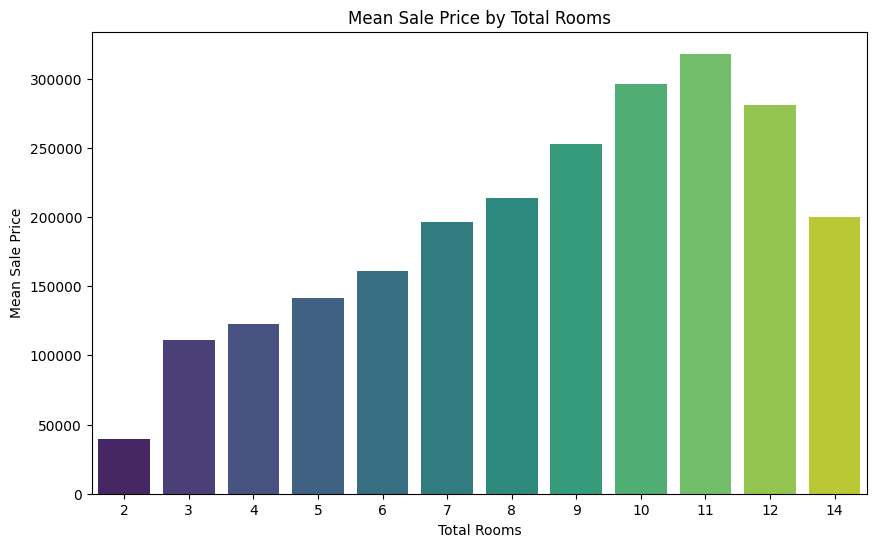

In [ ]:
# Assuming 'new_df' is your DataFrame
infoe = new_df.groupby(['TotalRooms'])['SalePrice'].mean().reset_index()

# Create a cool chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalRooms', y='SalePrice', data=infoe, palette='viridis')

# Add labels and title
plt.xlabel('Total Rooms')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price by Total Rooms')

# Show the plot
plt.show()

In [ ]:
info5 = new_df.groupby(['GarageCars'])['SalePrice'].mean()
info5

GarageCars
0    103317.283951
1    128116.688347
2    183851.663835
3    309636.121547
4    192655.800000
Name: SalePrice, dtype: float64

In [ ]:
infoc = new_df.groupby(['GarageCars'])['SalePrice'].size()
infoc

GarageCars
0     81
1    369
2    824
3    181
4      5
Name: SalePrice, dtype: int64

In [ ]:
infod = new_df.groupby(['YrSold'])['SalePrice'].size()
infod

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: SalePrice, dtype: int64

In [ ]:
infoe = new_df.groupby(['YrSold'])['SalePrice'].mean()
infoe

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

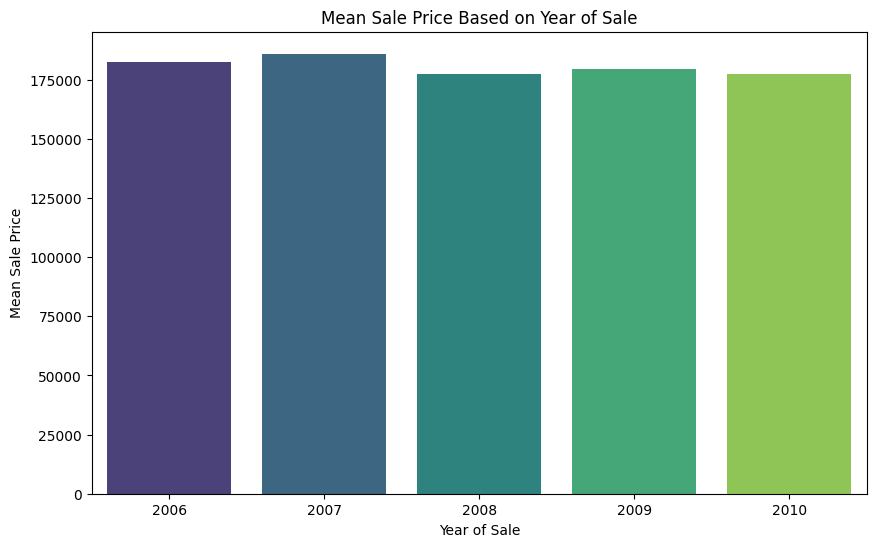

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_df' is your DataFrame
infoe = new_df.groupby(['YrSold'])['SalePrice'].mean().reset_index()

# Create a cool chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='YrSold', y='SalePrice', data=infoe, palette='viridis')

# Add labels and title
plt.xlabel('Year of Sale')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price Based on Year of Sale')

# Show the plot
plt.show()


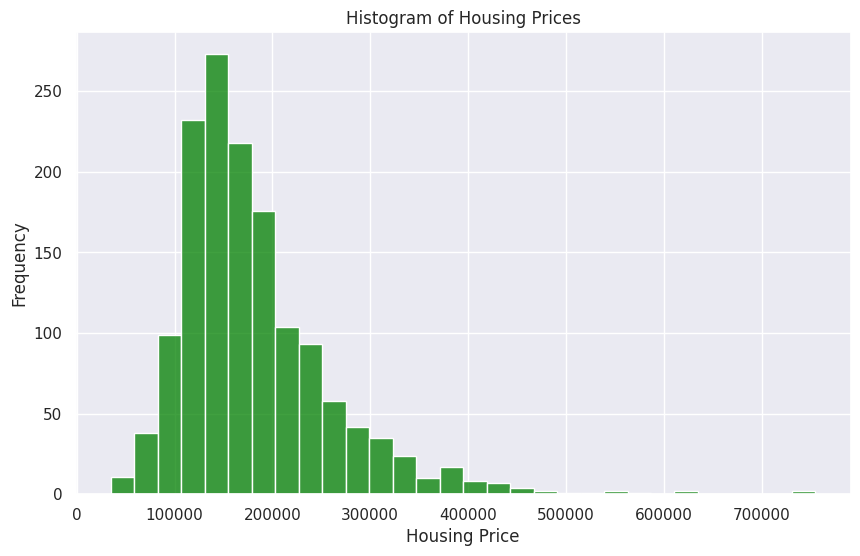

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(new_df['SalePrice'], bins=30, color='green', edgecolor='white', kde=False)

# Add labels and title
plt.xlabel('Housing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Prices')

# Show the plot
plt.show()




In [ ]:
house_stcount = new_df['HouseStyle'].value_counts()
house_stcount

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'housing_prices' is your DataFrame and 'HouseStyle' is the column to analyze
house_stcount = new_df['HouseStyle'].value_counts()

# Plotting bar chart
house_stcount.plot(kind='bar', color='pink', edgecolor='black')

# Set labels and title
plt.xlabel('House Style')
plt.ylabel('Count')
plt.title('Count of House Styles')

# Show the plot
plt.show()


In [ ]:
house_stcountprice = new_df.groupby('HouseStyle')['SalePrice'].mean()
house_stcountprice

HouseStyle
1.5Fin    143116.740260
1.5Unf    110150.000000
1Story    175985.477961
2.5Fin    220000.000000
2.5Unf    157354.545455
2Story    210051.764045
SFoyer    135074.486486
SLvl      166703.384615
Name: SalePrice, dtype: float64

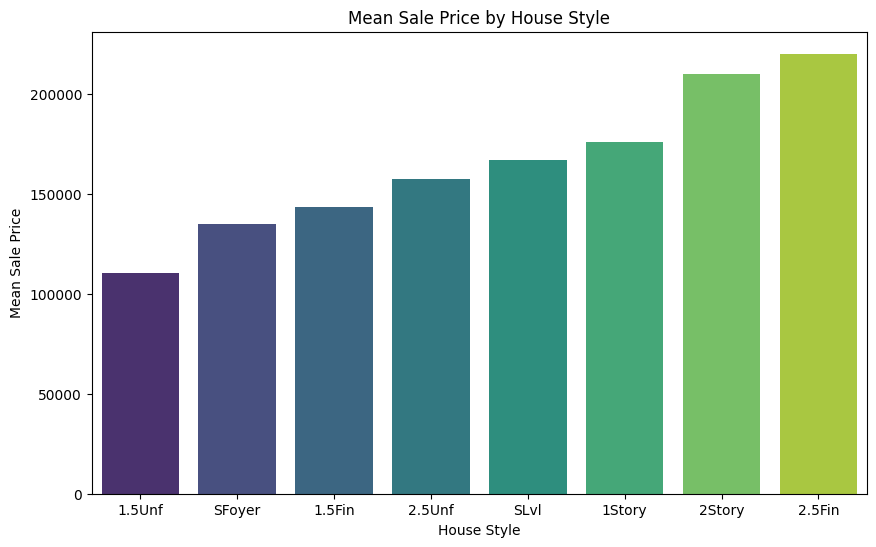

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_df' is your DataFrame and 'HouseStyle' is the column to analyze
house_stcountprice = new_df.groupby('HouseStyle')['SalePrice'].mean()

# Sorting by mean sale price in ascending order
house_stcountprice = house_stcountprice.sort_values()

# Plotting bar chart with Seaborn and 'viridis' color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=house_stcountprice.index, y=house_stcountprice.values, palette='viridis')

# Set labels and title
plt.xlabel('House Style')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price by House Style')

# Show the plot
plt.show()




<Axes: xlabel='SalePrice'>

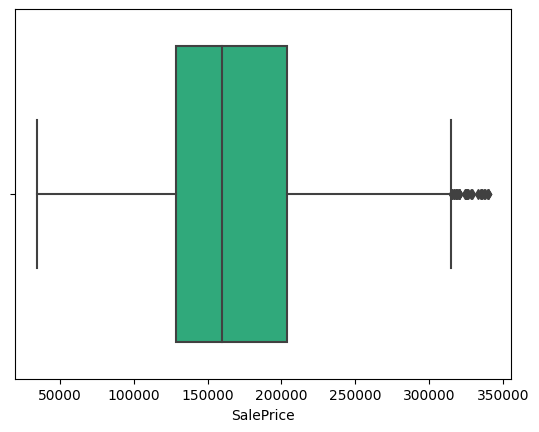

In [ ]:
custom_palette = ["#1CBD80", "#1CBD80", "#99CC00"]
sns.set_palette(custom_palette)
sns.boxplot(x = new_df['SalePrice'])

In [ ]:
housing_prices['SalePrice'].median()

163000.0

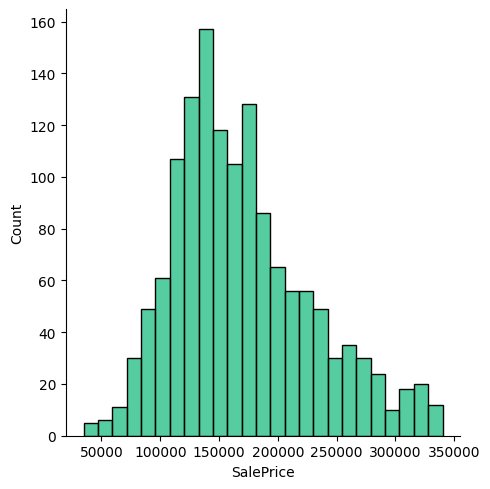

In [ ]:
sns.displot(new_df['SalePrice'], bins = 25, kde = False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram with spaced out x-axis
sns.displot(new_df['SalePrice'], bins=20, kde=False, binwidth=50000)

# Add labels and title
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Price')

# Show the plot
plt.show()


In [ ]:
## now I will detect outliers before I remove them. (Tukey's rule to remove or IQR rule)
housing_prices[['SalePrice']].describe()


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [ ]:
new_df['SalePrice'].quantile(0.25)

129975.0

In [ ]:
new_df['SalePrice'].quantile(0.75)

214000.0

In [ ]:
Q1 = new_df['SalePrice'].quantile(0.25)
Q3 = new_df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
IQR

84025.0

In [ ]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [ ]:
lower_lim

3937.5

In [ ]:
upper_lim

340037.5

In [ ]:
## this is good. Our upper boundary is 340037.5 and the lower boundary is 3937.5
## this means that the values between those are acceptable but those outside mean there
# are outliers. We will handle this.

In [ ]:
outliers_low = new_df['SalePrice'] < lower_lim
outliers_upper = new_df['SalePrice'] > upper_lim

In [ ]:
len(new_df['SalePrice']) - (len(new_df['SalePrice'][outliers_low]) + len(new_df['SalePrice'][outliers_upper]))


1399

In [ ]:
new_df['SalePrice'][outliers_low | outliers_upper]

11      345000
53      385000
58      438780
112     383970
151     372402
         ...  
1268    381000
1353    410000
1373    466500
1388    377500
1437    394617
Name: SalePrice, Length: 61, dtype: int64

In [ ]:
new_df['SalePrice'][~(outliers_low | outliers_upper)]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1399, dtype: int64

In [ ]:
new_df = new_df[~(outliers_low | outliers_upper)]
new_df

,HouseStyle,FullBath,CentralAir,GarageCars,YrSold,TotalRooms,OverallQual,SalePrice
0,2Story,2,Y,2,2008,8,7,208500
1,1Story,2,Y,2,2007,6,6,181500
2,2Story,2,Y,2,2008,6,7,223500
3,2Story,1,Y,3,2006,7,7,140000
4,2Story,2,Y,3,2008,9,8,250000
...,...,...,...,...,...,...,...,...
1455,2Story,2,Y,2,2007,7,6,175000
1456,1Story,2,Y,2,2010,7,6,210000
1457,2Story,2,Y,1,2010,9,7,266500
1458,1Story,1,Y,1,2010,5,5,142125


<Axes: xlabel='SalePrice'>

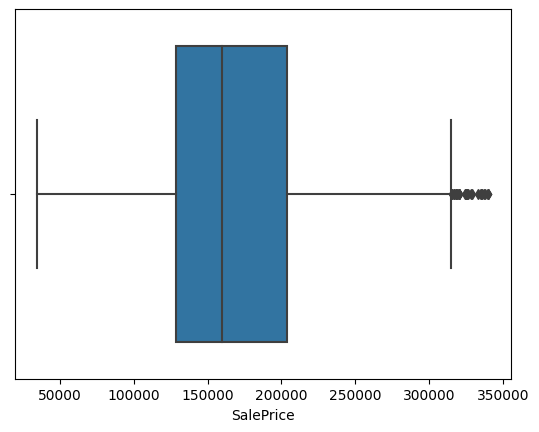

In [ ]:
sns.boxplot(x = new_df['SalePrice'])

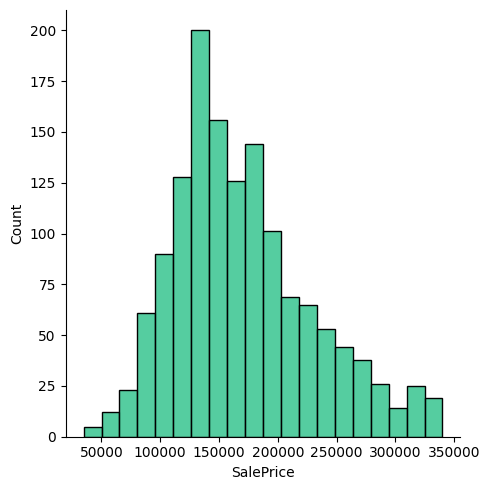

In [ ]:
import seaborn as sns
custom_palette = ["#1CBD80", "#1CBD80", "#99CC00"]
sns.set_palette(custom_palette)
sns.displot(new_df['SalePrice'], bins=20, kde=False, color='#1CBD80')


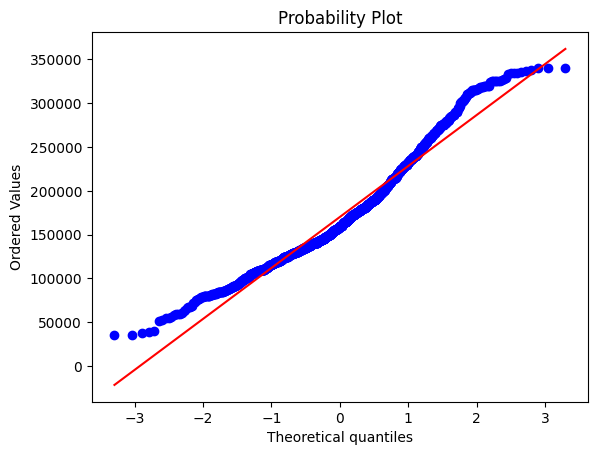

In [ ]:
import seaborn as sns
from scipy.stats import probplot
import matplotlib.pyplot as plt

# Create a Q-Q plot
fig, ax = plt.subplots()
qq_plot = probplot(new_df['SalePrice'], plot=ax)

# Show the plot
plt.show()



In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'df' is your DataFrame with relevant columns, including the dependent variable ('SalePrice') and independent variables
# For demonstration purposes, let's assume 'OverallQual', 'TotalRooms', and 'GarageCars' are your independent variables

# Prepare the data
X = new_df[['OverallQual', 'TotalRooms', 'GarageCars','FullBath',
                    ]]
y = new_df['SalePrice']



# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     869.8
Date:                Sat, 18 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:56:28   Log-Likelihood:                -17653.
No. Observations:                1460   AIC:                         3.532e+04
Df Residuals:                    1455   BIC:                         3.534e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.254e+05   5840.576    -21.471      